In [1]:
!pip install pandas_datareader

In [2]:
from pandas_datareader import data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import datetime
import seaborn as sns
sns.set()
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

stooqから株価の5,25,50日移動平均線と出来高チャート

In [3]:
def company_stock(start,end,company_code):
    df = data.DataReader(company_code, 'stooq')
    df = df[(df.index>=start) & (df.index<=end)]
    
    date=df.index
    price=df['Close']
    
    span01 = 5
    span02 = 25
    span03 = 50
    
    df['sma01'] = price.rolling(window=span01).mean()
    df['sma02'] = price.rolling(window=span02).mean()
    df['sma03'] = price.rolling(window=span03).mean()
    
    plt.figure(figsize=(20,10))
    plt.subplot(2,1,1)
    
    plt.plot(date,price,label='Close',color='#99b898')
    plt.plot(date,df['sma01'],label='sma01',color='#e84a5f')
    plt.plot(date,df['sma02'],label='sma02',color='#ff847c')
    plt.plot(date,df['sma03'],label='sma03',color='#feceab')
    
    plt.subplot(2,1,2)
    plt.bar(date,df['Volume'],label='Volume',color='grey')
    plt.legend()

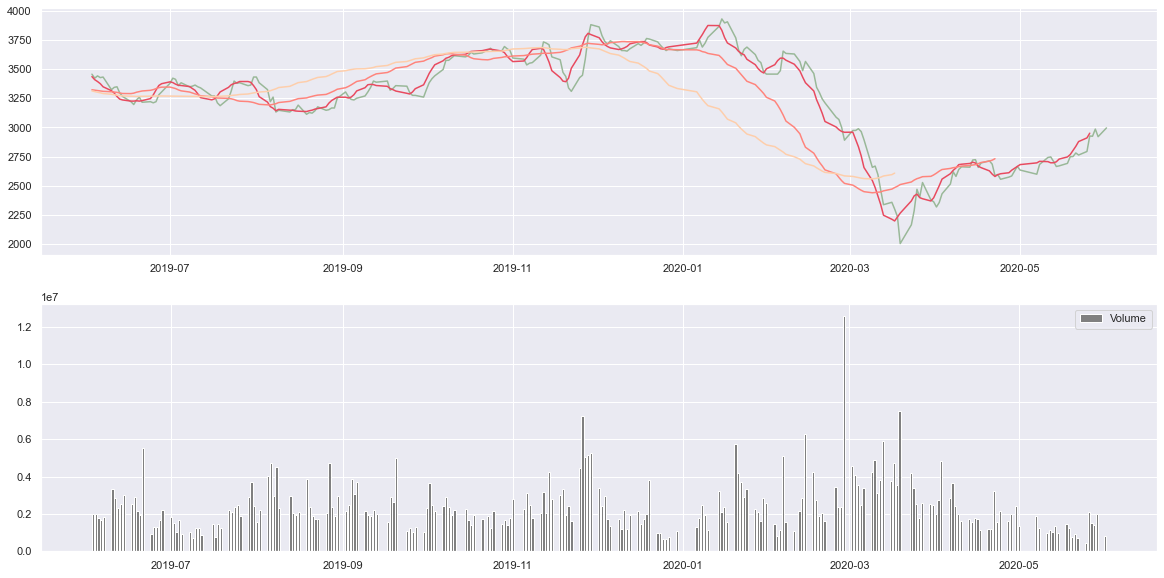

In [4]:
company_stock('2019-06-01','2020-06-01','6502.JP')

ferdから5,25,50日移動平均線

In [31]:
#fred
def index_price(starty,startm,startd,endy,endm,endd,index_code):
    start = datetime.datetime(starty, startm, startd)
    end = datetime.datetime(endy, endm, endd)
    eq = data.DataReader(index_code, 'fred', start, end)
    
    eq.dropna(inplace = True)
    
    date= eq.index
    price=eq[index_code]
    
    span01 = 5
    span02 = 25
    span03 = 50
    
    eq['sma01'] = price.rolling(window=span01).mean()
    eq['sma02'] = price.rolling(window=span02).mean()
    eq['sma03'] = price.rolling(window=span03).mean()
    
    plt.figure(figsize=(30, 10))
    plt.plot(date,price,label=index_code)
    plt.plot(date,eq['sma01'],label='5days')
    plt.plot(date,eq['sma02'],label='25days')
    plt.plot(date,eq['sma03'],label='50days')
    
    plt.title(index_code,color='blue',backgroundcolor='white',size=40,loc='center')
    plt.xlabel('date',color='black',size=30)
    plt.ylabel('price',color='black',size=30)
        
    plt.legend(fontsize=18)

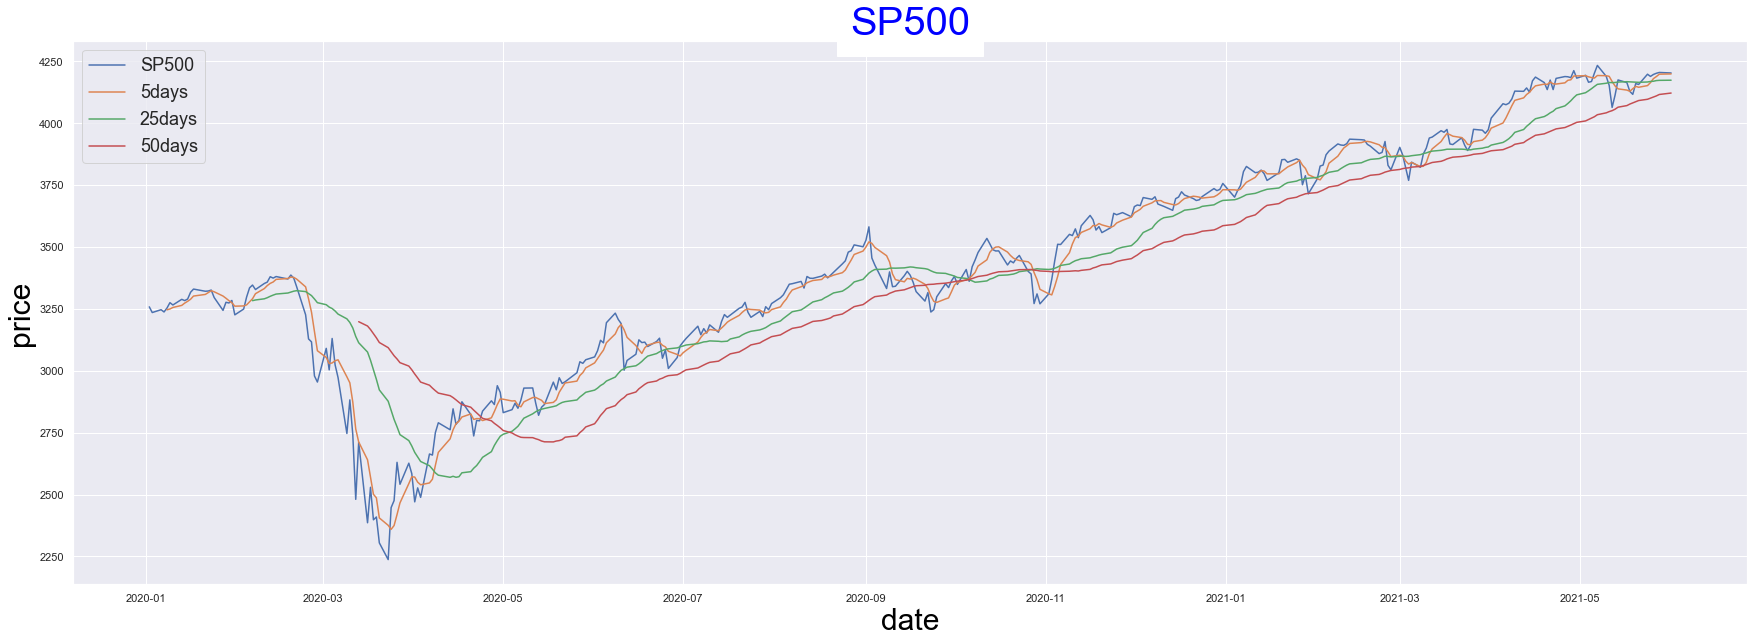

In [32]:
index_price(2020,1,1,2021,6,1,'SP500')

In [6]:
#取得するデータの開始日と最終日を指定
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2020, 5, 1)


#S&P500のデータを取得
# 'SP500'がS&P500のティッカーシンボル。
# 'fred'が、データソースとしてセントルイス連銀を指定する。
#あとは開始日と最終日。
eq = data.DataReader('SP500', 'fred', start, end)

#VIXのデータを取得
# 'VIXCLS'がVIXのティッカーシンボル。
vix = data.DataReader('VIXCLS','fred', start, end)

#取得したデータを１つのデータフレームにまとめる
df = pd.DataFrame(index = eq.index)
df['Equity'] = eq
df['VIX'] = vix
df.dropna(inplace = True)

In [8]:
#グラフを作る関数
def chart(days):
    dfd = df.copy()
    dfd['Return'] = (dfd['Equity'].shift(-days) /  dfd['Equity'] -1)
    dfd.dropna(inplace = True)
    plt.figure(figsize = (8,4))
    plt.scatter(x = dfd['VIX'], y = dfd['Return'], alpha = 0.6, c = dfd['VIX'])
    plt.xlabel('VIX')
    plt.ylabel(str(days)+' days Return')
    plt.title('VIX and S&P500 '+str(days)+' days Returns (USD base)')
    plt.savefig('VIX_SP500rtn',bbox_inches="tight")

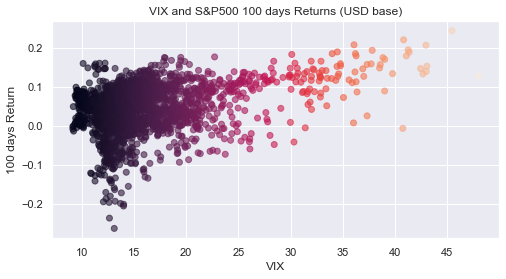

In [9]:
#何日間のリターンを計算するかを指定して関数実行
chart(100)

<AxesSubplot:title={'center':'VIX'}, xlabel='DATE'>

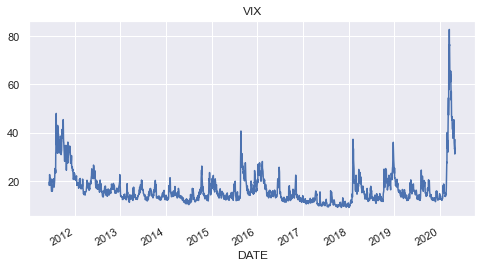

In [10]:
#VIXチャート
df['VIX'].plot(title = 'VIX', figsize = (8,4))

<AxesSubplot:title={'center':'S&P500'}, xlabel='DATE'>

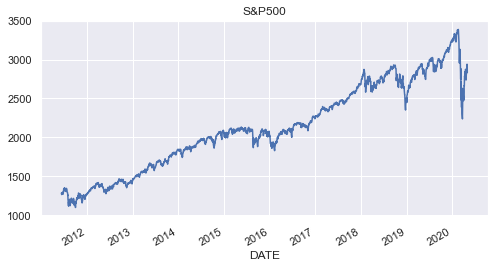

In [11]:
#SP500チャート
df['Equity'].plot(title = 'S&P500', figsize = (8,4))